<font size = "8"> Détection et Appairement de Points caractéristiques
---

# <font size = "6"> 2- Format d'images et convolutions
---

##<font size = "5"> Question 1
<font size = "4" color= "gray">Expérimenter le code de convolution fourni en exemple dans Convolutions.py. Observer la différence entre le calcul direct par balayage du tableau 2d et le calcul utilisant la fonction Ilter2d d’OpenCV. Déchiffrer les fonctions OpenCV utilisées pour la lecture et la copie d’images, ainsi que la fonction MatPlotLib utilisée pour l’affichage.

Install the library

In [ ]:
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
TD_DIR = 'gdrive/My Drive/Ensta/MI204'

Dimension de l'image : 320 lignes x 400 colonnes
Méthode directe : 0.31364057 s
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]
Méthode filter2D : 0.001361174 s


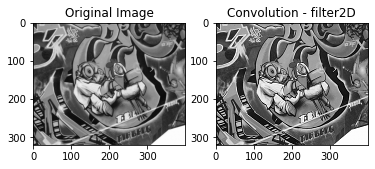

In [ ]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

#Lecture image en niveau de gris et conversion en float64
img=np.float64(cv2.imread(TD_DIR+'/Image_Pairs/Graffiti1.png',0))
(h,w) = img.shape
print("Dimension de l'image :",h,"lignes x",w,"colonnes")

#Méthode directe
t1 = cv2.getTickCount()
img2 = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
for y in range(1,h-1):
  for x in range(1,w-1):
    val = 5*img[y, x] - img[y-1, x] - img[y, x-1] - img[y+1, x] - img[y, x+1] 
    img2[y,x] = min(max(val,0),255)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode directe :",time,"s")

#cv2.imshow('Avec boucle python',img2.astype(np.uint8))
#Convention OpenCV : une image de type entier est interprétée dans {0,...,255}
#cv2.waitKey(0)  

plt.subplot(121)
plt.imshow(img,cmap = 'gray')
plt.title('Original Image')

#Méthode filter2D
t1 = cv2.getTickCount()
kernel = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])
print(kernel)
#kernel = np.array([[0, 0, 0],[0, 1, 0],[0, 0, 0]])
img3 = cv2.filter2D(img,-1,kernel)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode filter2D :",time,"s")

#cv2.imshow('Avec filter2D',img3/255.0)
#Convention OpenCV : une image de type flottant est interprétée dans [0,1]
#cv2.waitKey(0)

plt.subplot(122)
plt.imshow(img3,cmap = 'gray',vmin = 0.0,vmax = 255.0)
#Convention Matplotlib : par défaut, normalise l'histogramme !
plt.title('Convolution - filter2D')



plt.show()

Open CV ne fonctionne pas ici

##<font size = "5"> Question 2
<font size = "4" color="gray">Expliquer pourquoi le noyau de convolution fourni en exemple réalise un réhaussement de contraste par rapport à l’image originale.

Le noyaux se concentre sur le pixel cible, réduit les effets des pixels de bords et met en evidence la difference entre pixels:

[ 0  -1  0] \\
[-1   5 -1] \\
[ 0  -1  0]

##<font size = "5"> Question 3
<font size = "4" color= "gray">Modifier le code pour calculer les convolutions qui approximent les composantes du gradient $I_x = \frac{∂I}{∂x}$ et $I_y = \frac{∂I}{∂y}$

<font size = "4" color= "gray">Calculer ensuite la norme euclidienne du gradient $||∇I|| = \sqrt{I_{x}^2+I_{y}^2}$.


<font size = "4" color= "gray">Quelles précautions doivent être prises pour obtenir un affichage

**On reprend le code de la question 1**

###$I_x$ est approximé par une convolution avec le noyau $[-1, \  1]$


De même, $I_y$ est approximé par convolution avec le noyau $[-1,\  1]^T$

Méthode directe : 0.393183447 s


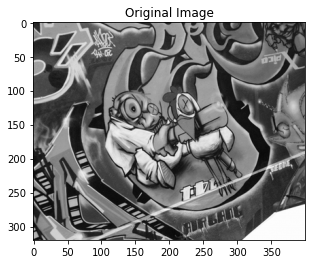


kernel_x: [-1  1]



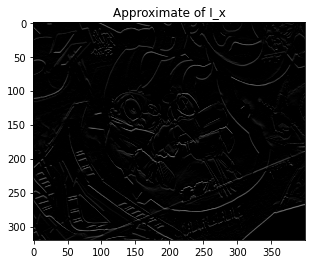


kernel_y: 
[[-1]
 [ 1]]



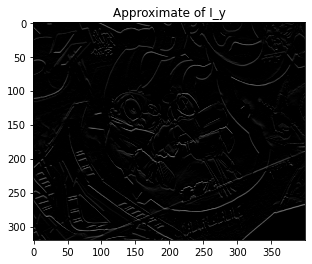

In [ ]:
#Image originale
t1 = cv2.getTickCount()
img2 = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
for y in range(1,h-1):
  for x in range(1,w-1):
    val = 5*img[y, x] - img[y-1, x] - img[y, x-1] - img[y+1, x] - img[y, x+1] 
    img2[y,x] = min(max(val,0),255)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode directe :",time,"s")

plt.imshow(img,cmap = 'gray')
plt.title('Original Image')
plt.show()


#Méthode filter2D
kernel_x = np.array([-1, 1])
print(f"\nkernel_x: {kernel_x}\n")
img3 = cv2.filter2D(img,-1,kernel_x)

#plt.subplot(121)
plt.imshow(img3,cmap = 'gray',vmin = 0.0,vmax = 255.0)
#Convention Matplotlib : par défaut, normalise l'histogramme !
plt.title('Approximate of I_x')
plt.show()


#Méthode filter2D
kernel_y = np.array([[-1], [1]])
print(f"\nkernel_y: \n{kernel_y}\n")
img3 = cv2.filter2D(img,-1,kernel_y)

#plt.subplot(122)
plt.imshow(img3,cmap = 'gray',vmin = 0.0,vmax = 255.0)
#Convention Matplotlib : par défaut, normalise l'histogramme !
plt.title('Approximate of I_y')



plt.show()

###On utilisera plutot les noyaux [-1 0 1] et sa transposée pour produire des frontières plus épaisses.

Méthode directe : 0.310608388 s


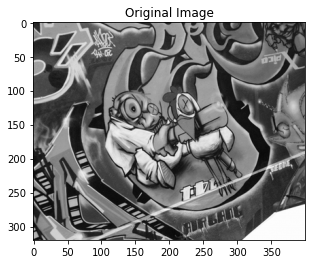


kernel_x: [-1  0  1]



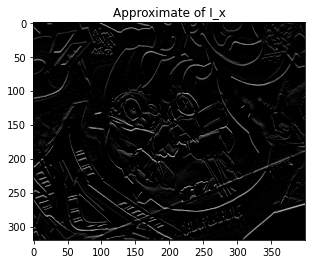


kernel_y: 
[[-1]
 [ 0]
 [ 1]]



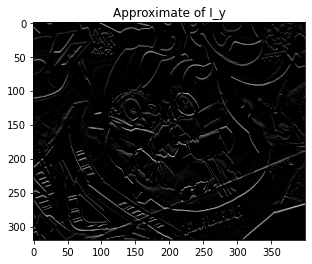

In [ ]:
#Image originale
t1 = cv2.getTickCount()
img2 = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
for y in range(1,h-1):
  for x in range(1,w-1):
    val = 5*img[y, x] - img[y-1, x] - img[y, x-1] - img[y+1, x] - img[y, x+1] 
    img2[y,x] = min(max(val,0),255)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode directe :",time,"s")

plt.imshow(img,cmap = 'gray')
plt.title('Original Image')
plt.show()


#Méthode filter2D
kernel_x = np.array([-1,0, 1])
print(f"\nkernel_x: {kernel_x}\n")
img3 = cv2.filter2D(img,-1,kernel_x)

#plt.subplot(121)
plt.imshow(img3,cmap = 'gray',vmin = 0.0,vmax = 255.0)
#Convention Matplotlib : par défaut, normalise l'histogramme !
plt.title('Approximate of I_x')
plt.show()


#Méthode filter2D
kernel_y = np.array([[-1],[0], [1]])
print(f"\nkernel_y: \n{kernel_y}\n")
img3 = cv2.filter2D(img,-1,kernel_y)

#plt.subplot(122)
plt.imshow(img3,cmap = 'gray',vmin = 0.0,vmax = 255.0)
#Convention Matplotlib : par défaut, normalise l'histogramme !
plt.title('Approximate of I_y')



plt.show()

###Calcul de $||∇I|| = \sqrt{I_{x}^2+I_{y}^2}$.

$I_{x}[i, j] = (f*h_x)[i,j]$ avec $h_x = [\  [-1\ 0 \ 1]\  [-2\ 0\ 2]\  [-1\ 0\ 1]\  ]$


$I_{y}[i, j] = (f*h_y)[i,j]$ avec $h_y = [\  [-1\ 0 \ 1]\  [0\ 0\ 0]\  [1\ 2\ 1]\  ]$


$||∇I[i,j]|| = \sqrt{I_{x}^2[i,j]+I_{y}^2[i,j]} =  \sqrt{(f*h_y)^2[i,j]+(f*h_x)^2[i,j]}$



In [ ]:
h_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
h_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

I_x = cv2.filter2D(img,-1,h_x)
I_y = cv2.filter2D(img,-1,h_y)

#Calcul de delta_I :
delta_I = np.sqrt(I_x**2+I_y**2)
print(f"shape of delta_I : {delta_I.shape}")

shape of delta_I : (320, 400)


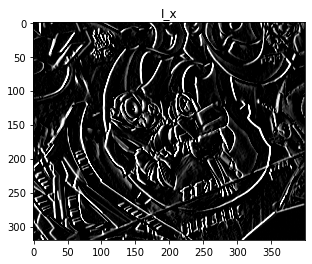

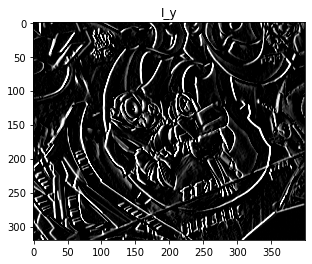

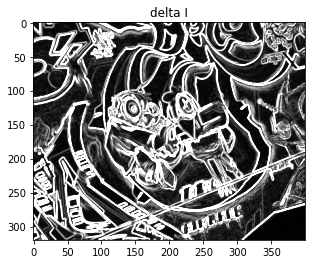

In [ ]:
#Regardons ce qu'il en est :
plt.imshow(I_x,cmap = 'gray',vmin = 0.0,vmax = 255.0)
plt.title('I_x')
plt.show()

plt.imshow(I_x,cmap = 'gray',vmin = 0.0,vmax = 255.0)
plt.title('I_y')
plt.show()


plt.imshow(delta_I,cmap = 'gray',vmin = 0.0,vmax = 255.0)
plt.title('delta I')
plt.show()

<font size = "6">**Précautions à prendre pour obtenir un affichage ?**

# <font size = "6"> 3- Détecteurs

---

##<font size = "5"> Question 4
<font size = "4" color="gray"> Completer  le code fourni dans le script Harris.py pour calculer la fonction d’interet de Harris (a
une seule echelle, en utilisant une fenetre W de taille fixe), et les points d’interet correspondants. Expliquer comment le code fourni, qui utilise la dilatation morphologique (maximum dans un voisinage
donne), permet de calculer les maxima locaux de la fonction d’interet Theta.


####Ci-dessous le code Harris.py

g est la fonction gaussienne

G est la fonction gaussienne dans $\mathbb{R}^2$

Gx, Gy sont les dérivées selon x et y

make_Gkernel crée un noyau gaussien qui, convolué avec l'image donne la dérivée gaussienne

calcul_theta est, d'où son nom original, un calculateur de theta


In [ ]:
def g(x, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-x**2/(2*sigma**2))

def G(x,y, sigma):
    return 1/np.sqrt((2*np.pi*sigma**2)) * np.exp(-(x**2+y**2)/(2*sigma**2))
    
def Gx(x, y, sigma):
    return -x/(sigma**2) * G(x, y, sigma)
    
def Gy(x, y, sigma):
    return -y/(sigma**2) * G(x, y, sigma)

def make_Gkernel(w, sigma):
    kernel_x = np.zeros((w, w))
    kernel_y = np.zeros((w, w))
    
    for i in range(w):
        for j in range(w):
            kernel_x[i, j] = Gx(i-w//2, j-w//2, sigma)
            kernel_y[i, j] = Gy(i-w//2, j-w//2, sigma)
    
    return kernel_x, kernel_y

def calcul_theta(x, y, W, Dx, Dy, sigma, alpha):
    autocorr = np.zeros((2,2))
    for i in range(W):
        for j in range(W):
            u = x-W//2+i
            v = y-W//2+j
            g = G(i-W//2, j-W//2, sigma)
            autocorr[0,0] += g*Dx[u, v]**2
            autocorr[0,1] += g*Dx[u, v]*Dy[u, v]
            autocorr[1,0] += g*Dx[u, v]*Dy[u, v]
            autocorr[1,1] += g*Dy[u, v]**2
    
    return np.linalg.det(autocorr) - alpha*(np.trace(autocorr)**2)

In [ ]:
#Début du calcul
t1 = cv2.getTickCount()
Theta = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
# Mettre ici le calcul de la fonction d'intérêt de Harris

W_ = 5
alpha = 0.06
sigma1 = 1
sigma2 = 2*sigma1

# On calcule les dérivées premières à partir des dérivées de gaussienne (écart-type s1)
kx, ky = make_Gkernel(25, sigma=sigma1)  # 25 est choisi de façon a coller avec les images du cours.

Dx = cv2.filter2D(Theta,-1,kx)
Dy = cv2.filter2D(Theta,-1,ky)

print("calcul theta ---> ")

for i in range(0, h-W_//2):
    for j in range(0, w-W_//2):
        Theta[i, j] = calcul_theta(i, j, W_, Dx, Dy, sigma=sigma2, alpha=alpha)


# Calcul des maxima locaux et seuillage
Theta_maxloc = cv2.copyMakeBorder(Theta,0,0,0,0,cv2.BORDER_REPLICATE)
d_maxloc = 3
seuil_relatif = 0.01
se = np.ones((d_maxloc,d_maxloc),np.uint8)
Theta_dil = cv2.dilate(Theta,se)
#Suppression des non-maxima-locaux
Theta_maxloc[Theta < Theta_dil] = 0.0
#On néglige également les valeurs trop faibles
Theta_maxloc[Theta < seuil_relatif*Theta.max()] = 0.0
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Mon calcul des points de Harris :",time,"s")
print("Nombre de cycles par pixel :",(t2 - t1)/(h*w),"cpp")

calcul theta ---> 
Mon calcul des points de Harris : 45.229178929 s
Nombre de cycles par pixel : 221872.6278329376 cpp


In [ ]:
se_croix = np.uint8([[1, 0, 0, 0, 1],
[0, 1, 0, 1, 0],[0, 0, 1, 0, 0],
[0, 1, 0, 1, 0],[1, 0, 0, 0, 1]])
Theta_ml_dil = cv2.dilate(Theta_maxloc,se_croix)
#Relecture image pour affichage couleur
Img_pts=cv2.imread(TD_DIR+'/Image_Pairs/maison.png',cv2.IMREAD_COLOR)
(h,w,c) = Img_pts.shape
print("Dimension de l'image :",h,"lignes x",w,"colonnes x",c,"canaux")
print("Type de l'image :",Img_pts.dtype)
#On affiche les points (croix) en rouge
Img_pts[Theta_ml_dil > 0] = [255,0,0]

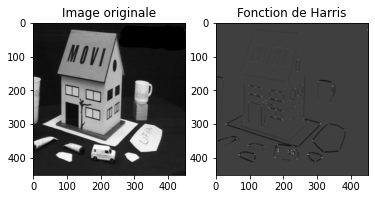

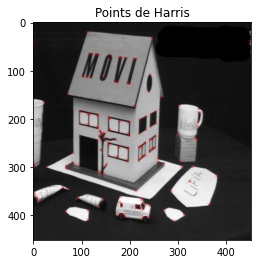

In [ ]:
plt.subplot(121)
plt.imshow(img,cmap = 'gray')
plt.title('Image originale')

plt.subplot(122)
plt.imshow(Theta,cmap = 'gray')
plt.title('Fonction de Harris')

plt.show()

plt.imshow(Img_pts)
plt.title('Points de Harris')

plt.show()

#### <font color = "gray"> Expliquer comment le code fourni, qui utilise la dilatation morphologique (max dans un voisinage donné), permet de calculer les maxima locaux de la fonction d'intérpet de Theta



Dans la matrice theta_dil, on va agrandir les zones claires de façon à recouvrir une partie des zones un peu moins claire voisines. 

Pour un pixel donné, si sa valeur dans theta_dil est supérieure à sa valeur dans theta, cela veut dire qu'il a été recouvert par un pixel voisin qui s'est étendu ayant une valeur supérieure dans la matrice theta. Le pixel en question n'est alors pas un maximum local.

Lorsqu'un pixel est maximum local, il ne se fera recouvrir par aucun autre pixel voisin lors de la dilatation. Sa valeur reste la même dans les matrices theta et theta_dil. Il est alors conservé lors de l'execution de la ligne : *$\theta_{max\ loc}[\theta < \theta_{dil}] = 0.0$*

On se retrouve avec une matrice $\theta_{dil}$ ne contenant que les maxima locaux de theta.

##<font size = "5"> Question 5
<font size = "4" color="gray">Commenter les résultats obtenus avec votre detecteur de Harris et l’effet des paramètres utilisés, taille de la fenêtre de sommation et valeur de $\alpha$ en particulier. Comment peut-on realiser ce
calcul sur plusieurs echelles ? Comment ́etendre la notion de maxima locaux our faire en sorte que deux points d’intérêt soient toujours distants d’au moins r pixels ?

L'image choisie pour l'étude comporte de nombreux points anguleux. Notre détecteur a réussi a en repérer la plupart. Cependant, certains angles ne sont pas détectés tels que sur la feuille à droite ou le coin inférieur de la maison au premier plan.


$\alpha$ est utilisé pour pondérer la pénalisation des forts contrastes avec 1 seule valeure propre qui font référence à des bords unidirectionels. Diminuer $\alpha$ revient à noter comme point de Harris tous points qui appartient à un bord. Or, nous ne voulons repérer que les coins.


Après plusieurs essais à des valeurs différentes, on remarque que agmenter le fenêtre de sommation (K\_) augmente grandement le temps de calcul sans pour autant opérer beaucoup de changements dans la détection des points de Harris. En effet, grâce à la sommation gaussienne, les points éloignés du centre de la fenêtre de sommation sont pondérés avec un très faibles coefficients devant ceux au centre. Nous choisissons alors de continuer avec $W\_ = 5$ 


Pour réaliser le calcul sur plusieurs échelle, il suffit de faire varier $\sigma _1$. En effet, le sous échantillonage de l'image est équivalent à l'image filtrée en pleine résolution. Plus l'échelle sera petite (i.e. $\sigma _1$ grand), moins de points de Harris seront détectés car les bords et les coins seront de moins en moins nets.


Afin de faire en sorte que 2 maxima locaux soient toujours distants d'au moins r pixels, il suffit d'écrire $d\_ maxloc = 2r-1$.
Cela permettra au maxima local de valeur supérieure de ne pas recouvrir l'autre maxima local lors de la dilatation. Ces deux points auront donc la même valeur dans les matrices theta et theta_dil et donc ne seront pas éliminés de theta_dil.

##<font size = "5"> Question 6
<font size = "4" color = "gray">Experimenter et comparer les deux détecteurs ORB et KAZE en lançant le script Features Detect.py. Rappeler le principe de chacun de ces détecteurs. Expliquer les principaux paramètres
propres à chaque détecteur et leur effet sur la détection.


###**Détecteurs ORB et KAZE** :

La pemière chose qu'on remarque en comparant les images générées par ces deux détecteurs est la taille des cercles dessinés (rayon du cercle proportionnel au facteur d'échelle). Le détecteur KAZE va se concentrer sur des points d'intérêts à petite échelle alors que le détecteur ORB, sur des points d'intérêts à plus grande échelle. Cela se traduit également par le fait que ORB ve se concentrer sur le centre de l'image, là où la densité de points d'intérêts est maximale. KAZE va en revanche s'éloigner du centre en détectant les brisures sur le poteau dans l'exemple de la photo du phare.

**ORB :**


Extension du détecteur FAST.
Le détecteur FAST sélectionne les points d'intérêt dont le voisinage circulaire présente des plages contigües assez longues de points significativement plus clairs (ou plus sombres).

FAST est alors calculé à plusieurs résolutions (chaque point possède une échelle caractéristique)

Pour chaque point FAST P, le centre de rgavité O de l'imagette carrée qui circonscrit le cercle FAST est calculé et la direction du vecteur PO est utilisée comme orientétion caractéristique du point.

ORB utilise également une technique pour orienter les descripteurs en fonction du gradient de l'image autour du point d'intérêt, ce qui améliore la robustesse du détecteur aux changements de rotation de l'image.

**KAZE :**

Le détecteur Kaze résout une équation de la chaleur dont l'image convoluée avec une gaussienne est solution.

On cherche à avoir un lissage le long du contour et non orthogonalement.

Dans **KAZE** on se focalise sur le déterminant de la Hessienne, on se focalise alors sur le produit des valeurs propres de la Hessienne et non sur leur somme. Ainsi,  on identi
e les spots circulaires dans l'image, pour lesquels la valeur absolue de la courbure est forte dans toutes les directions.

Contrairement à ORB, KAZE calcule des descripteurs de caractéristiques en utilisant des moments de Zernike, qui sont une représentation mathématique des formes et des motifs locaux dans l'image. KAZE utilise également une technique d'échelle non-linéaire pour détecter des points d'intérêt à différentes échelles de l'image.





###Paramètres propres à chacun des détecteurs et effets sur la détection :
Les paramètres d'ORB :
Seuil de réponse FAST, contrôle la sensibilité du détecteur à la détection de points d'intérêt,
Nombre de facteur d'échelle à utiliser pour la détection de points d'intérêt multi-échelle,
taille du patch utilisé pour calculer les descripteurs BRIEF.


Les paramètres de KAZE :  
Taille de l'image de lissage utilisée pour supprimer le bruit
Nombre de facteur d'échelle utilisés pour la détection de points d'intérêt multi-échelle. 
KAZE peut également être configuré pour utiliser une version modifiée de l'algorithme de diffusion anisotropique pour améliorer la robustesse aux variations d'éclairage et aux textures complexes.

 <font size = "4" color = "gray"> Comment peut-on visuellement évaluer la répétabilité de chaque détecteur appliqué sur une paire d’images ?

# <font size = "6"> 4 - Descripteurs et Appariement

---

##<font size = "5"> Question 7
<font size = "4" color = "gray">Expliquer le principe des descripteurs attachés aux points ORB et ceux attachés aux points KAZE. Quelles propriétées des détecteurs et/ou des descripteurs (distinguer les deux aspects dans la réponse), permettent de rendre l’appariement invariant par changement d’échelles et invariant par rotation ?

L'invariance de l'appariement par changement d'échelle et par rotation est dûe à la fondation des espaces d'échelles qui ont pour opérateur la convolution. C'est ce dernier qu'on utilise pour détecter les points anguleux d'une image.





##<font size = "5"> Question 8

<font size = "4" color = "gray">Expliquer et comparer qualitativement les performances des trois stratégies d’appariement de points d’intérêt réalisées dans les trois scripts *Features_Match_CrossCheck.py*, *Features_Match_RatioTest.py* et *Features_Match_FLANN.py*. Expliquer pourquoi les distances utilisées sont différentes pour les deux descripteurs.

Pour Features_Match_CrossCheck et Features_Match_RatioTest :       
  - ORB : utilisation du descripteur BRIEF => calcul de la **distance de Hamming** entre deux keypoints
  - KAZE :  utilisation du descripteur M-SURF => caclul de la **distance L2** entre 2 keypoints


Test effectués sur l'image du phare :


|        Détecteur          | nb appariements Features Match CrossCheck |  nb appariements Features Match RatioTest | nb appariements Features Match FLANN
|---------------------------|--------------------------|------------------------|----------------------
|        ORB                |         200   (max)      |         62        |   -
|        KAZE               |         200   (max)      |         175       |   175

##<font size = "5"> Question 9

<font size = "4" color = "gray"> Proposer une stratégie pour évaluer quantitativement la qualité des appariements en déformant une image avec une transformation géométrique connue (on pourra utiliser une fonction telle que
cv2.warpAffine)


https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

In [ ]:
#prendre une image et tester Feature_Match_RatioTest.py avec la commande "./Feature_Match_RatioTest.py orb" et "./Feature_Match_RatioTest.py orb" dans le terminal

#Faire un tableau markdown récapitulatif du type :

|        Détecteur  ORB     | nb appariements Features Match CrossCheck |  nb appariements Features Match RatioTest | nb appariements Features Match FLANN
|---------------------------|--------------------------|------------------------|----------------------
|        rotation                |         -      |         -        |   -
|        translation               |        -      |        -       |   -
|        transf3                |         -      |         -        |   -
|        transf4              |        -      |        -       |   -
|        transf5                 |         -      |         -        |   -

------------------------------------------------------------------------------

|        Détecteur  KAZE     | nb appariements Features Match CrossCheck |  nb appariements Features Match RatioTest | nb appariements Features Match FLANN
|---------------------------|--------------------------|------------------------|----------------------
|        rotation                |         -      |         -        |   -
|        translation               |        -      |        -       |   -
|        transf3                |         -      |         -        |   -
|        transf4              |        -      |        -       |   -
|        transf5                 |         -      |         -        |   -


####**Code de Features_Match_RatioTest.py à éxecuter dans le terminal avec la commande "Features_Match_RatioTest.py orb" (ou "kaze") ou  "./Features_Match_RatioTest.py orb" (ou "kaze")**

In [1]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

import sys
if len(sys.argv) != 2:
  print ("Usage :",sys.argv[0],"detector(= orb ou kaze)")
  sys.exit(2)
if sys.argv[1].lower() == "orb":
  detector = 1
elif sys.argv[1].lower() == "kaze":
  detector = 2
else:
  print ("Usage :",sys.argv[0],"detector(= orb ou kaze) match_method (= bf ou flann)")
  sys.exit(2)


transormation = input('\nTransformation:\n0 : pas de transformation\n1 : resize\n2 : resize2\n3 : translation\n4 : rotation\n5 : transformation affine\n6 : Perspective\nChoix : ')
#Lecture de la paire d'images
img1 = cv2.imread('../Image_Pairs/torb_small1.png')
print("Dimension de l'image 1 :",img1.shape[0],"lignes x",img1.shape[1],"colonnes")
print("Type de l'image 1 :",img1.dtype)
img2 = cv2.imread('../Image_Pairs/torb_small2.png')
print("Dimension de l'image 2 :",img2.shape[0],"lignes x",img2.shape[1],"colonnes")
print("Type de l'image 2 :",img2.dtype)

rows,cols,ch = img1.shape
#TRANSFORMATION 1 - resize
img1_1 = cv2.resize(img1,(3*cols, 2*rows), interpolation = cv2.INTER_CUBIC)

#TRANSFORMATION 2 - resize
img1_2 = cv2.resize(img1,(2*cols, 3*rows), interpolation = cv2.INTER_CUBIC)

#TRANSFORMATION 3 - translation
M = np.float32([[1,0,100],[0,1,50]])
img1_3 = cv2.warpAffine(img1,M,(cols,rows))

#TRANSFORMATION 4 - rotation
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
img1_4 = cv2.warpAffine(img1,M,(cols,rows))

#TRANSFORMATION 5 - transformation affine
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
img1_5 = cv2.warpAffine(img1,M,(cols,rows))

#TRANSFORMATION 6 - perspective
pts1 = np.float32([[156,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
img1_6 = cv2.warpPerspective(img1,M,(300,300))


#Début du calcul
t1 = cv2.getTickCount()
#Création des objets "keypoints"
if detector == 1:
  kp1 = cv2.ORB_create(nfeatures = 500,#Par défaut : 500
                       scaleFactor = 1.2,#Par défaut : 1.2
                       nlevels = 8)#Par défaut : 8
  kp2 = cv2.ORB_create(nfeatures=500,
                        scaleFactor = 1.2,
                        nlevels = 8)
  print("Détecteur : ORB")
else:
  kp1 = cv2.KAZE_create(upright = False,#Par défaut : false
    		        threshold = 0.001,#Par défaut : 0.001
  		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  kp2 = cv2.KAZE_create(upright = False,#Par défaut : false
	  	        threshold = 0.001,#Par défaut : 0.001
		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  print("Détecteur : KAZE")


gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
#pas de transformation :
if transormation=="0":
  #Conversion en niveau de gris
  gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
elif transormation=="1":
  plt.subplot(121)
  plt.imshow(img1,cmap = 'gray')
  plt.title('Image originale')

  plt.subplot(122)
  plt.imshow(img1_1,cmap = 'gray')
  plt.title('Image transformée')

  plt.show()
  print("\n transfo 1!\n")
  gray2 =  cv2.cvtColor(img1_1,cv2.COLOR_BGR2GRAY)

elif transormation=="2":
  plt.subplot(121)
  plt.imshow(img1,cmap = 'gray')
  plt.title('Image originale')

  plt.subplot(122)
  plt.imshow(img1_2,cmap = 'gray')
  plt.title('Image transformée')

  plt.show()
  print("\n transfo 2!\n")
  gray2 =  cv2.cvtColor(img1_2,cv2.COLOR_BGR2GRAY)

elif transormation=="3":
  plt.subplot(121)
  plt.imshow(img1,cmap = 'gray')
  plt.title('Image originale')

  plt.subplot(122)
  plt.imshow(img1_3,cmap = 'gray')
  plt.title('Image transformée')

  plt.show()
  print("\n transfo 3!\n")
  gray2 =  cv2.cvtColor(img1_3,cv2.COLOR_BGR2GRAY)

elif transormation=="4":
  plt.subplot(121)
  plt.imshow(img1,cmap = 'gray')
  plt.title('Image originale')

  plt.subplot(122)
  plt.imshow(img1_4,cmap = 'gray')
  plt.title('Image transformée')

  plt.show()
  print("\n transfo 4!\n")
  gray2 =  cv2.cvtColor(img1_4,cv2.COLOR_BGR2GRAY)

elif transormation=="5":
  plt.subplot(121)
  plt.imshow(img1,cmap = 'gray')
  plt.title('Image originale')

  plt.subplot(122)
  plt.imshow(img1_5,cmap = 'gray')
  plt.title('Image transformée')

  plt.show()
  print("\n transfo 5!\n")
  gray2 =  cv2.cvtColor(img1_5,cv2.COLOR_BGR2GRAY)

elif transormation=="6":
  plt.subplot(121)
  plt.imshow(img1,cmap = 'gray')
  plt.title('Image originale')

  plt.subplot(122)
  plt.imshow(img1_6,cmap = 'gray')
  plt.title('Image transformée')

  plt.show()
  print("\n transfo 6!\n")
  gray2 =  cv2.cvtColor(img1_6,cv2.COLOR_BGR2GRAY)


#Détection et description des keypoints
pts1, desc1 = kp1.detectAndCompute(gray1,None)
pts2, desc2 = kp2.detectAndCompute(gray2,None)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Détection points et calcul descripteurs :",time,"s")
# Calcul de l'appariement
t1 = cv2.getTickCount()
if detector == 1:
  #Distance de Hamming pour descripteur BRIEF (ORB)
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
else:
  #Distance L2 pour descripteur M-SURF (KAZE)
  bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
# Extraction de la liste des 2-plus-proches-voisins
matches = bf.knnMatch(desc1,desc2, k=2)
# Application du ratio test
good = []
for m,n in matches:
  if m.distance < 0.7*n.distance:
    good.append([m])
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Calcul de l'appariement :",time,"s")

# Affichage des appariements qui respectent le ratio test
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   flags = 0)
img3 = cv2.drawMatchesKnn(gray1,pts1,gray2,pts2,good,None,**draw_params)

Nb_ok = len(good)
plt.imshow(img3),plt.title('%i appariements OK'%Nb_ok)
plt.show()

Usage : /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py detector(= orb ou kaze)


SystemExit: ignored

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
